In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lm


In [7]:
# Reading the training and validation data set
data = pd.read_excel('training.xlsx')
valid = pd.read_excel('validation.xlsx')
# display the training data set
data.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [76]:
#print the columns names we are going to use later
print(data.columns)

Index(['variable1', 'variable2', 'variable3', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable8', 'variable9', 'variable10',
       'variable11', 'variable12', 'variable13', 'variable14', 'variable15',
       'variable17', 'variable18', 'variable19', 'classLabel'],
      dtype='object')


In [80]:
print(data.shape) # to know the number of variables and data, so we can track the code later
print(data.describe()) # in order to give us a look on the nature of the dataset

(3700, 19)
         variable2    variable3     variable8   variable11   variable14  \
count  3661.000000  3700.000000   3700.000000  3700.000000  3600.000000   
mean     32.820713     0.000585    607.676546     4.160000   162.695000   
std      12.666181     0.000540   1955.270061     6.750553   156.045682   
min      13.750000     0.000000      0.000000     0.000000     0.000000   
25%      23.000000     0.000150      0.500000     0.000000     0.000000   
50%      28.670000     0.000425      2.250000     2.000000   120.000000   
75%      40.830000     0.000963      7.500000     6.000000   280.000000   
max      80.250000     0.002800  14415.000000    67.000000  1160.000000   

          variable15    variable17   variable19  
count    3700.000000  3.600000e+03  3700.000000  
mean     2246.705946  1.626950e+06     0.925405  
std      8708.571126  1.560457e+06     0.262772  
min         0.000000  0.000000e+00     0.000000  
25%         0.000000  0.000000e+00     1.000000  
50%       113

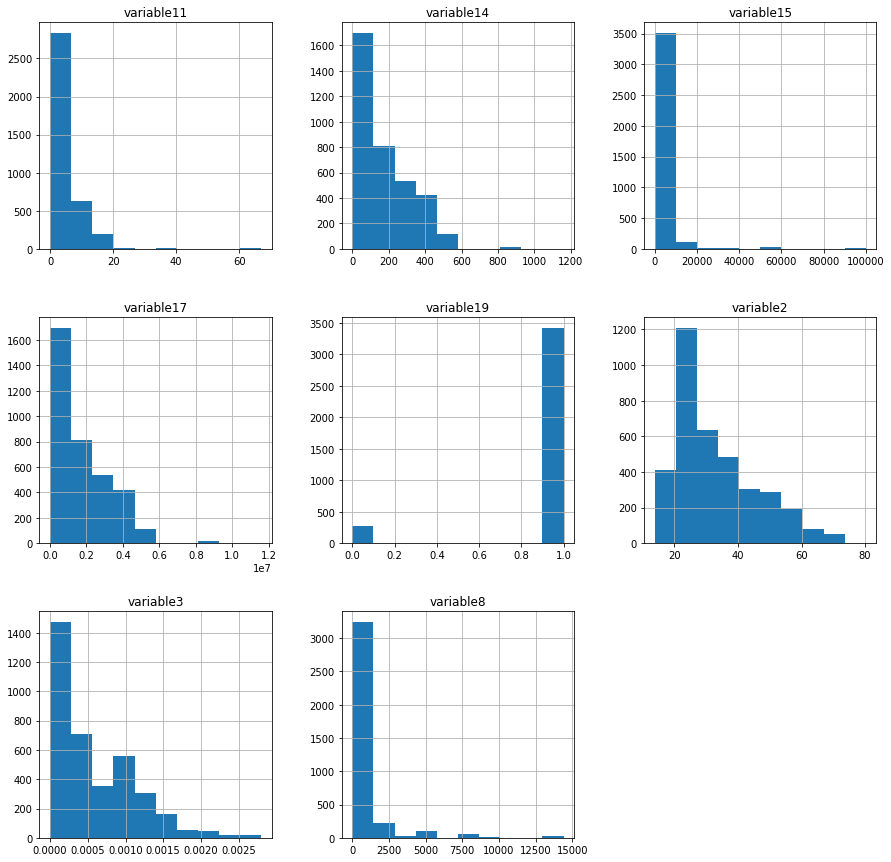

In [83]:
# for more visual reprsentation of the data by histograms
data.hist(figsize = (15, 15))
plt.show()

As represented in the following most variables has almost zero relationship
however, variable3 has strong inversely propotion with varible14 and 17
and variable 3 and 11 has directly propotion

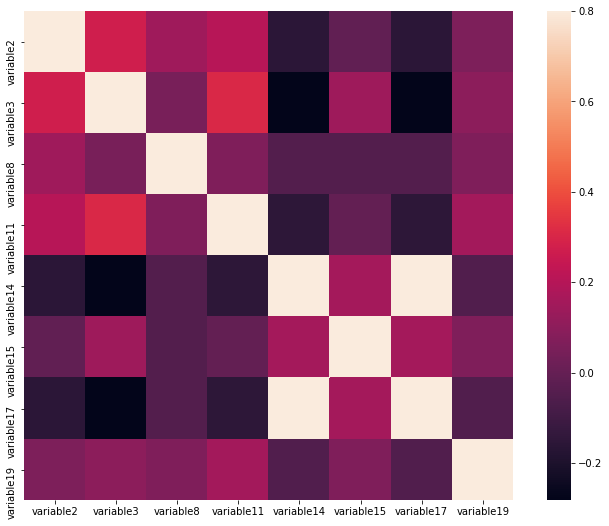

In [84]:
#Corelation Matrix to see the corelation between variables with each other
# Also to understand the nature of the dataset
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [85]:
#to know the number of classes
data['classLabel'].value_counts()

yes.    3424
no.      276
Name: classLabel, dtype: int64

In [86]:
# creat two classes
yes = data[data['classLabel'] == 'yes.']
no = data[data['classLabel'] == 'no.']

# to know ratio between classes
outlier_fraction = len(no)/float(len(yes))
print(outlier_fraction)


0.08060747663551401


In [9]:
# to know the data type of each varriable in the dataset
data.dtypes


variable1      object
variable2     float64
variable3     float64
variable4      object
variable5      object
variable6      object
variable7      object
variable8     float64
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
variable17    float64
variable18     object
variable19      int64
classLabel     object
dtype: object

As you can see here, there are an object data type, so we need to convert them into float so mathmatical operations can be applied

In [13]:
# to convert the data types of both datasets of training and validation
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name]=data[pd.to_numeric(data[column_name], errors = 'coerce').notnull()]
        data[column_name]=data[column_name].astype('float')
    else:
            pass
for column_name in valid.columns:
    if valid[column_name].dtype == object:
        valid[column_name]=valid[pd.to_numeric(valid[column_name], errors = 'coerce').notnull()]
        valid[column_name]=valid[column_name].astype('float')
    else:
            pass
# to show data type after conversion        
valid.dtypes


variable1     float64
variable2     float64
variable3     float64
variable4     float64
variable5     float64
variable6     float64
variable7     float64
variable8     float64
variable9     float64
variable10    float64
variable11      int64
variable12    float64
variable13    float64
variable14    float64
variable15      int64
variable17    float64
variable18    float64
variable19      int64
classLabel    float64
dtype: object

In [14]:
# the following two lines to put zero instead of any missing data
data= data.fillna(0)
valid= valid.fillna(0)

# set up the independant varible of training
indep_train=data[['variable1', 'variable2', 'variable3', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable8', 'variable9', 'variable10',
       'variable11', 'variable12', 'variable13', 'variable14', 'variable15',
       'variable17', 'variable18', 'variable19']]
xtrain= np.asarray(indep_train)

# set up the dependant varible of training
ytrain = np.asarray(data['classLabel'])

# set up the independant varible of validation
indep_t = valid[['variable1', 'variable2', 'variable3', 'variable4', 'variable5',
       'variable6', 'variable7', 'variable8', 'variable9', 'variable10',
       'variable11', 'variable12', 'variable13', 'variable14', 'variable15',
       'variable17', 'variable18', 'variable19']]
xtest= np.asarray(indep_t)
# set up the dependant varible of validation
ytest = np.asarray(valid['classLabel'])

The next graph shows the expected values and true values meet at zero. Almost no difference.

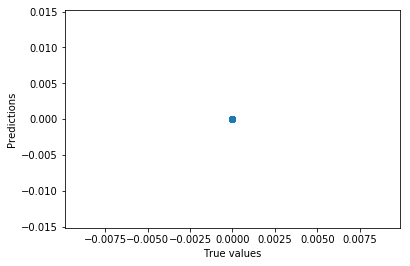

In [15]:
#training on the datasets
model=lm().fit(xtrain,ytrain)

#to make a prediction
predictions=model.predict(xtest)

#to graph the difference between the true values from the validation set and the predicted values
plt.scatter(ytest,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

